In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Problem Statement**: You have just been hired as an AI expert by the French Football Corporation. They would like you to recommend positions where France's goal keeper should kick the ball so that the French team's players can then hit it with their head. 

In [2]:
trainX = pd.read_csv('datasets/train.csv').iloc[:,1:]
trainY = pd.read_csv('datasets/trainY.csv').iloc[:,1:]

testX = pd.read_csv('datasets/test.csv').iloc[:,1:]
testY = pd.read_csv('datasets/testY.csv').iloc[:,1:]

In [3]:
trainX.shape

(211, 2)

In [4]:
trainY.shape

(211, 1)

In [5]:
testX.shape

(200, 2)

In [6]:
testY.shape

(200, 1)

In [7]:
trainX.head()

,0,1
0,-0.158986,0.423977
1,-0.347926,0.470760
2,-0.504608,0.353801
3,-0.596774,0.114035
4,-0.518433,-0.172515


In [8]:
trainY.head()

,0
0,1
1,1
2,1
3,1
4,1


In [9]:
trainY['0'].value_counts()

1    106
0    105
Name: 0, dtype: int64

In [10]:
df = pd.concat([trainX,trainY],axis = 1)
df.columns = ['X','Y','Target']
df['Target'].replace({1:'French',0:'Others'},inplace = True)
df.head()

,X,Y,Target
0,-0.158986,0.423977,French
1,-0.347926,0.470760,French
2,-0.504608,0.353801,French
3,-0.596774,0.114035,French
4,-0.518433,-0.172515,French


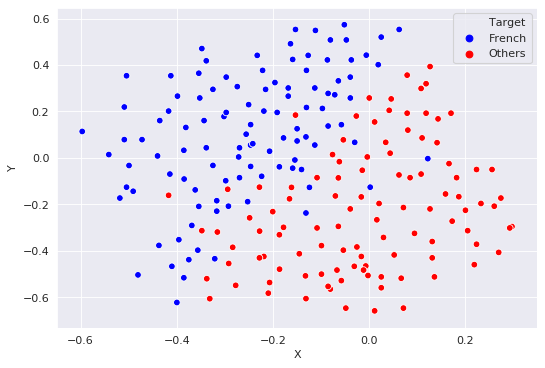

In [11]:
sns.set_style('darkgrid')
fig = plt.figure(dpi = 80,figsize = (6,4))
ax = fig.add_axes([1,1,1,1])

sns.scatterplot(x='X',y='Y',data=df,hue='Target',ax = ax,palette = ['blue','red']);

## Taking Data

In [12]:
x_train,y_train = trainX.values,trainY.values
x_test,y_test = testX.values,testY.values

In [13]:
x_train.shape

(211, 2)

In [14]:
y_train.shape

(211, 1)

In [15]:
x_test.shape

(200, 2)

In [16]:
y_test.shape

(200, 1)

# Non Regularized Model

In [17]:
#def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8,kernel_initializer = 'he_normal',activation = 'elu',input_shape = [2]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6,kernel_initializer = 'he_normal',activation = 'elu'),
    tf.keras.layers.Dense(4,kernel_initializer = 'he_normal',activation = 'elu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [19]:
gd = tf.compat.v1.train.GradientDescentOptimizer(
    learning_rate=0.3, use_locking=False, name='GradientDescent')

In [20]:
model.compile(loss = 'binary_crossentropy',optimizer = gd,metrics = ['accuracy'])

In [21]:
history  = model.fit(x_train,y_train,
         epochs = 500,
         validation_data = (x_test,y_test))

Epoch 1/500
7/7 [==============================] - 1s 90ms/step - loss: 0.6169 - accuracy: 0.6730 - val_loss: 0.5087 - val_accuracy: 0.7700
Epoch 2/500
7/7 [==============================] - 0s 34ms/step - loss: 0.4733 - accuracy: 0.7915 - val_loss: 0.3906 - val_accuracy: 0.8300
Epoch 3/500
7/7 [==============================] - 0s 41ms/step - loss: 0.3529 - accuracy: 0.8768 - val_loss: 0.3433 - val_accuracy: 0.8450
Epoch 4/500
7/7 [==============================] - 0s 31ms/step - loss: 0.3417 - accuracy: 0.8673 - val_loss: 0.2753 - val_accuracy: 0.9100
Epoch 5/500
7/7 [==============================] - 0s 39ms/step - loss: 0.3484 - accuracy: 0.8341 - val_loss: 0.2590 - val_accuracy: 0.9250
Epoch 6/500
7/7 [==============================] - 0s 38ms/step - loss: 0.3582 - accuracy: 0.8152 - val_loss: 0.2932 - val_accuracy: 0.8850
Epoch 7/500
7/7 [==============================] - 0s 35ms/step - loss: 0.3078 - accuracy: 0.8483 - val_loss: 0.2680 - val_accuracy: 0.9200
Epoch 8/500
7/7 [===

7/7 [==============================] - 0s 18ms/step - loss: 0.2512 - accuracy: 0.9194 - val_loss: 0.2472 - val_accuracy: 0.9300
Epoch 60/500
7/7 [==============================] - 0s 17ms/step - loss: 0.2487 - accuracy: 0.9100 - val_loss: 0.3436 - val_accuracy: 0.8800
Epoch 61/500
7/7 [==============================] - 0s 27ms/step - loss: 0.2532 - accuracy: 0.9052 - val_loss: 0.2463 - val_accuracy: 0.9350
Epoch 62/500
7/7 [==============================] - 0s 30ms/step - loss: 0.2802 - accuracy: 0.8863 - val_loss: 0.2475 - val_accuracy: 0.9200
Epoch 63/500
7/7 [==============================] - 0s 34ms/step - loss: 0.2599 - accuracy: 0.9052 - val_loss: 0.2506 - val_accuracy: 0.9150
Epoch 64/500
7/7 [==============================] - 0s 31ms/step - loss: 0.2570 - accuracy: 0.9147 - val_loss: 0.2433 - val_accuracy: 0.9350
Epoch 65/500
7/7 [==============================] - 0s 35ms/step - loss: 0.2322 - accuracy: 0.9242 - val_loss: 0.2415 - val_accuracy: 0.9200
Epoch 66/500
7/7 [========

7/7 [==============================] - 0s 27ms/step - loss: 0.2298 - accuracy: 0.9242 - val_loss: 0.2456 - val_accuracy: 0.9150
Epoch 118/500
7/7 [==============================] - 0s 34ms/step - loss: 0.2248 - accuracy: 0.9242 - val_loss: 0.2364 - val_accuracy: 0.9350
Epoch 119/500
7/7 [==============================] - 0s 30ms/step - loss: 0.2399 - accuracy: 0.9242 - val_loss: 0.2550 - val_accuracy: 0.9150
Epoch 120/500
7/7 [==============================] - 0s 27ms/step - loss: 0.2679 - accuracy: 0.9100 - val_loss: 0.2353 - val_accuracy: 0.9300
Epoch 121/500
7/7 [==============================] - 0s 37ms/step - loss: 0.2341 - accuracy: 0.9194 - val_loss: 0.2421 - val_accuracy: 0.9250
Epoch 122/500
7/7 [==============================] - 0s 22ms/step - loss: 0.2397 - accuracy: 0.9242 - val_loss: 0.2380 - val_accuracy: 0.9350
Epoch 123/500
7/7 [==============================] - 0s 30ms/step - loss: 0.2303 - accuracy: 0.9194 - val_loss: 0.2355 - val_accuracy: 0.9250
Epoch 124/500
7/7 [=

Epoch 175/500
7/7 [==============================] - 0s 33ms/step - loss: 0.2206 - accuracy: 0.9289 - val_loss: 0.2281 - val_accuracy: 0.9250
Epoch 176/500
7/7 [==============================] - 0s 34ms/step - loss: 0.2192 - accuracy: 0.9289 - val_loss: 0.2299 - val_accuracy: 0.9350
Epoch 177/500
7/7 [==============================] - 0s 32ms/step - loss: 0.2269 - accuracy: 0.9005 - val_loss: 0.2321 - val_accuracy: 0.9200
Epoch 178/500
7/7 [==============================] - 0s 37ms/step - loss: 0.2246 - accuracy: 0.9147 - val_loss: 0.2340 - val_accuracy: 0.9300
Epoch 179/500
7/7 [==============================] - 0s 24ms/step - loss: 0.2205 - accuracy: 0.9336 - val_loss: 0.2262 - val_accuracy: 0.9250
Epoch 180/500
7/7 [==============================] - 0s 33ms/step - loss: 0.2469 - accuracy: 0.9242 - val_loss: 0.2312 - val_accuracy: 0.9350
Epoch 181/500
7/7 [==============================] - 0s 21ms/step - loss: 0.2230 - accuracy: 0.9289 - val_loss: 0.2252 - val_accuracy: 0.9300
Epoch 

7/7 [==============================] - 0s 36ms/step - loss: 0.2291 - accuracy: 0.9194 - val_loss: 0.2245 - val_accuracy: 0.9350
Epoch 233/500
7/7 [==============================] - 0s 30ms/step - loss: 0.2193 - accuracy: 0.9289 - val_loss: 0.2470 - val_accuracy: 0.9200
Epoch 234/500
7/7 [==============================] - 0s 48ms/step - loss: 0.2250 - accuracy: 0.9384 - val_loss: 0.2271 - val_accuracy: 0.9200
Epoch 235/500
7/7 [==============================] - 0s 28ms/step - loss: 0.2260 - accuracy: 0.9194 - val_loss: 0.2409 - val_accuracy: 0.9150
Epoch 236/500
7/7 [==============================] - 0s 23ms/step - loss: 0.2024 - accuracy: 0.9194 - val_loss: 0.2289 - val_accuracy: 0.9250
Epoch 237/500
7/7 [==============================] - 0s 30ms/step - loss: 0.2273 - accuracy: 0.9242 - val_loss: 0.2645 - val_accuracy: 0.8950
Epoch 238/500
7/7 [==============================] - 0s 27ms/step - loss: 0.2199 - accuracy: 0.9194 - val_loss: 0.2275 - val_accuracy: 0.9200
Epoch 239/500
7/7 [=

7/7 [==============================] - 0s 42ms/step - loss: 0.2322 - accuracy: 0.9289 - val_loss: 0.2452 - val_accuracy: 0.9200
Epoch 290/500
7/7 [==============================] - 0s 22ms/step - loss: 0.2275 - accuracy: 0.9336 - val_loss: 0.2356 - val_accuracy: 0.9250
Epoch 291/500
7/7 [==============================] - 0s 18ms/step - loss: 0.2319 - accuracy: 0.9100 - val_loss: 0.2415 - val_accuracy: 0.9200
Epoch 292/500
7/7 [==============================] - 0s 27ms/step - loss: 0.2223 - accuracy: 0.9289 - val_loss: 0.2331 - val_accuracy: 0.9350
Epoch 293/500
7/7 [==============================] - 0s 22ms/step - loss: 0.2177 - accuracy: 0.9336 - val_loss: 0.2432 - val_accuracy: 0.9200
Epoch 294/500
7/7 [==============================] - 0s 23ms/step - loss: 0.2200 - accuracy: 0.9336 - val_loss: 0.2331 - val_accuracy: 0.9300
Epoch 295/500
7/7 [==============================] - 0s 33ms/step - loss: 0.2282 - accuracy: 0.9242 - val_loss: 0.2584 - val_accuracy: 0.9150
Epoch 296/500
7/7 [=

Epoch 347/500
7/7 [==============================] - 0s 31ms/step - loss: 0.2387 - accuracy: 0.8957 - val_loss: 0.2226 - val_accuracy: 0.9400
Epoch 348/500
7/7 [==============================] - 0s 24ms/step - loss: 0.2233 - accuracy: 0.9336 - val_loss: 0.2526 - val_accuracy: 0.9200
Epoch 349/500
7/7 [==============================] - 0s 28ms/step - loss: 0.2207 - accuracy: 0.9384 - val_loss: 0.2212 - val_accuracy: 0.9350
Epoch 350/500
7/7 [==============================] - 0s 29ms/step - loss: 0.2188 - accuracy: 0.9242 - val_loss: 0.2262 - val_accuracy: 0.9200
Epoch 351/500
7/7 [==============================] - 0s 29ms/step - loss: 0.2358 - accuracy: 0.9336 - val_loss: 0.2283 - val_accuracy: 0.9350
Epoch 352/500
7/7 [==============================] - 0s 34ms/step - loss: 0.2246 - accuracy: 0.9242 - val_loss: 0.2569 - val_accuracy: 0.9150
Epoch 353/500
7/7 [==============================] - 0s 25ms/step - loss: 0.2112 - accuracy: 0.9194 - val_loss: 0.2289 - val_accuracy: 0.9300
Epoch 

Epoch 405/500
7/7 [==============================] - 0s 25ms/step - loss: 0.2265 - accuracy: 0.9194 - val_loss: 0.2309 - val_accuracy: 0.9250
Epoch 406/500
7/7 [==============================] - 0s 29ms/step - loss: 0.2184 - accuracy: 0.9336 - val_loss: 0.2448 - val_accuracy: 0.9200
Epoch 407/500
7/7 [==============================] - 0s 28ms/step - loss: 0.2276 - accuracy: 0.9289 - val_loss: 0.2254 - val_accuracy: 0.9350
Epoch 408/500
7/7 [==============================] - 0s 29ms/step - loss: 0.2192 - accuracy: 0.9336 - val_loss: 0.2466 - val_accuracy: 0.9200
Epoch 409/500
7/7 [==============================] - 0s 27ms/step - loss: 0.2245 - accuracy: 0.9242 - val_loss: 0.2267 - val_accuracy: 0.9300
Epoch 410/500
7/7 [==============================] - 0s 22ms/step - loss: 0.2233 - accuracy: 0.9336 - val_loss: 0.2263 - val_accuracy: 0.9300
Epoch 411/500
7/7 [==============================] - 0s 27ms/step - loss: 0.2134 - accuracy: 0.9336 - val_loss: 0.2282 - val_accuracy: 0.9250
Epoch 

Epoch 463/500
7/7 [==============================] - 0s 27ms/step - loss: 0.2203 - accuracy: 0.9100 - val_loss: 0.2338 - val_accuracy: 0.9250
Epoch 464/500
7/7 [==============================] - 0s 28ms/step - loss: 0.2122 - accuracy: 0.9242 - val_loss: 0.2276 - val_accuracy: 0.9350
Epoch 465/500
7/7 [==============================] - 0s 28ms/step - loss: 0.2272 - accuracy: 0.9194 - val_loss: 0.2377 - val_accuracy: 0.9250
Epoch 466/500
7/7 [==============================] - 0s 30ms/step - loss: 0.2292 - accuracy: 0.9194 - val_loss: 0.2349 - val_accuracy: 0.9200
Epoch 467/500
7/7 [==============================] - 0s 27ms/step - loss: 0.2139 - accuracy: 0.9289 - val_loss: 0.2365 - val_accuracy: 0.9250
Epoch 468/500
7/7 [==============================] - 0s 27ms/step - loss: 0.2022 - accuracy: 0.9336 - val_loss: 0.2398 - val_accuracy: 0.9250
Epoch 469/500
7/7 [==============================] - 0s 27ms/step - loss: 0.2072 - accuracy: 0.9289 - val_loss: 0.2463 - val_accuracy: 0.9250
Epoch 

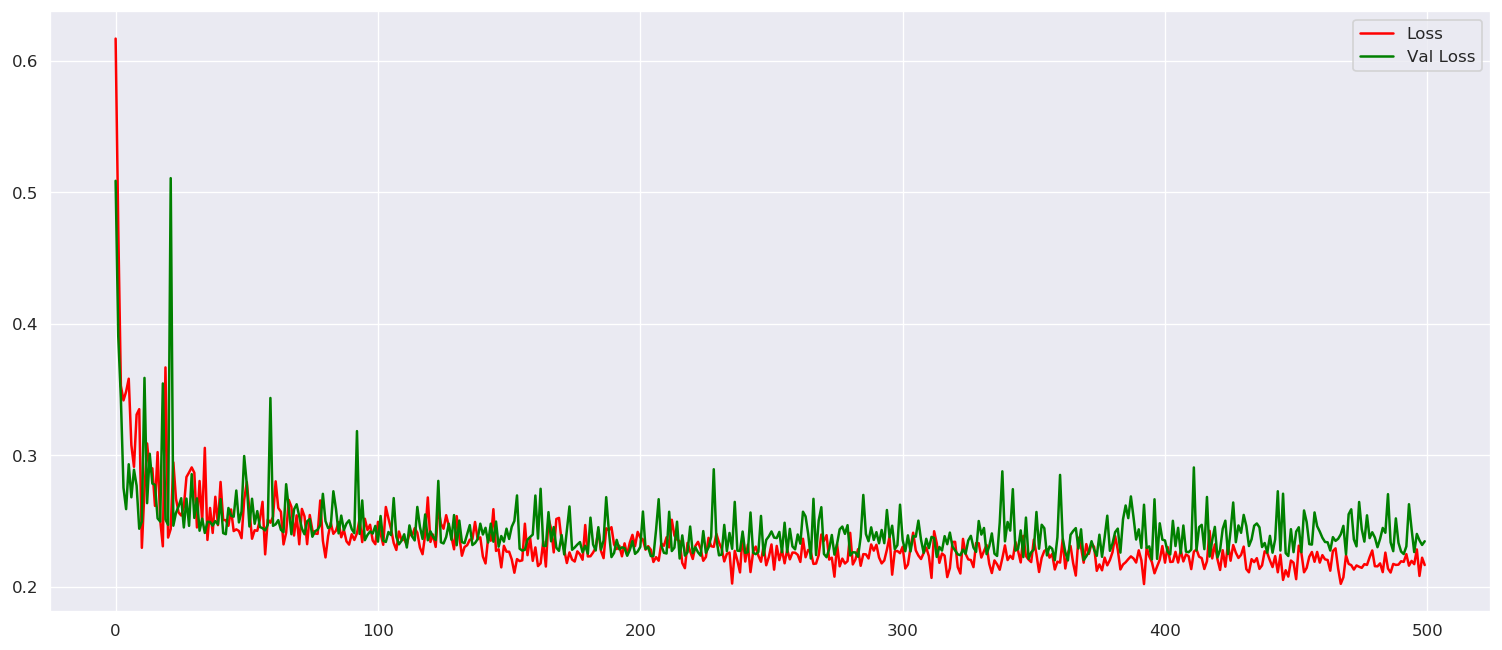

In [22]:
fig = plt.figure(dpi = 120,figsize = (12,5))
ax = fig.add_axes([1,1,1,1])

loss = history.history['loss'][:500]
val_loss = history.history['val_loss']
epoch = range(500)

ax.plot(epoch,loss,color = 'red',label = 'Loss')
ax.plot(epoch,val_loss,color = 'green',label = 'Val Loss')
plt.legend();

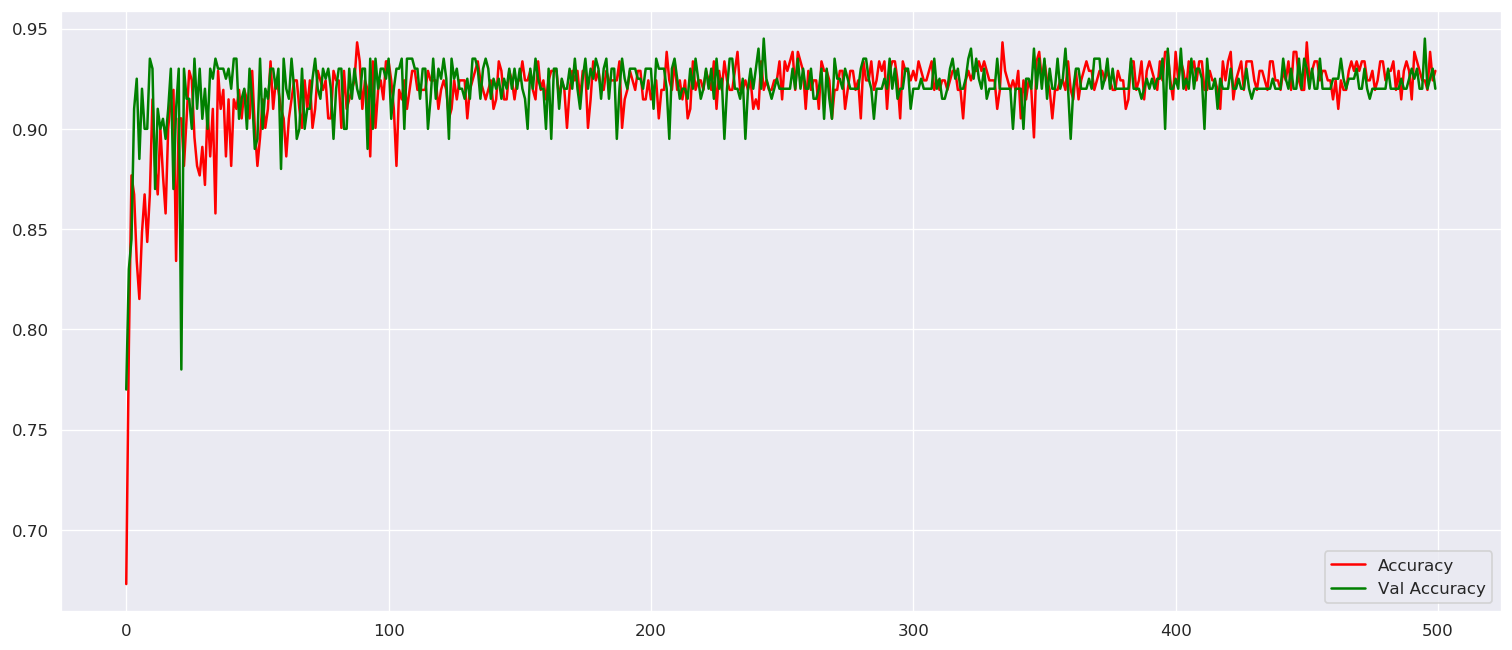

In [23]:
fig = plt.figure(dpi = 120,figsize = (12,5))
ax = fig.add_axes([1,1,1,1])

acc = history.history['accuracy'][:500]
val_acc = history.history['val_accuracy']
epoch = range(500)

ax.plot(epoch,acc,color = 'red',label = 'Accuracy')
ax.plot(epoch,val_acc,color = 'green',label = 'Val Accuracy')
plt.legend();

In [24]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

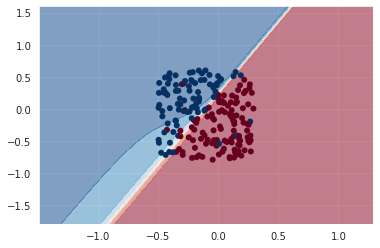

In [25]:
plot_decision_boundary(x_test, y_test.flatten(), model, cmap='RdBu');

In [26]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.2346 - accuracy: 0.9200


[0.23459060490131378, 0.9200000166893005]

In [36]:
x,y = input("Enter Cordinates of Player ==> ").split()

arr = np.array([x,y],dtype = float).reshape(1,2)
cl = model.predict_classes(arr)[0][0]

if cl == 0:
    print("Sorry!! You missed hitting Ball.....")
else:
    print("Wow!! You hitted Hard...")

Enter Cordinates of Player ==> -0.158986 0.423977
Wow!! You hitted Hard...
